<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/OpenCvTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

画像をダウンロード

In [1]:
import urllib.request

url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
urllib.request.urlretrieve(url, "lena.png") 

('lena.png', <http.client.HTTPMessage at 0x7fd3301ad4a8>)

そのまま表示すると BGR で表示

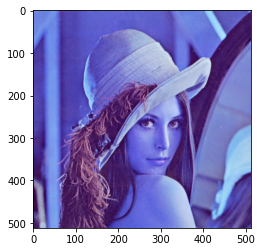

In [2]:
import cv2
import matplotlib.pyplot as plt

lena_bgr = cv2.imread("lena.png")
plt.imshow(lena_bgr)
plt.show()

RGB に変換すれば元の色に

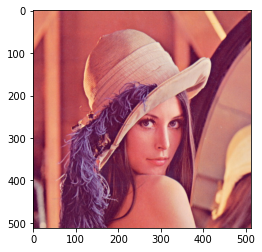

In [3]:
lena_rgb = cv2.cvtColor(lena_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(lena_rgb)
plt.show()

Haar-cascade の識別機の読み込み

In [4]:
url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
urllib.request.urlretrieve(url, "haarcascade_frontalface_default.xml") 
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml'
urllib.request.urlretrieve(url, "haarcascade_eye.xml") 
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

顔と眼の認識

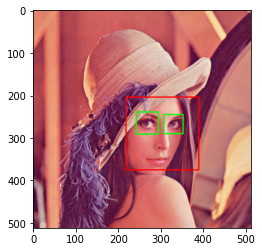

In [8]:
lena_gray = cv2.cvtColor(lena_rgb, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(lena_gray, 1.3, 5)
for (x,y,w,h) in faces:
    lena_rgb = cv2.rectangle(lena_rgb,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = lena_gray[y:y+h, x:x+w]
    roi_color = lena_rgb[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(lena_rgb)
plt.show()